<a href="https://colab.research.google.com/github/TanChen168/Week4_ExploratoryViz/blob/main/RecreateGraph2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

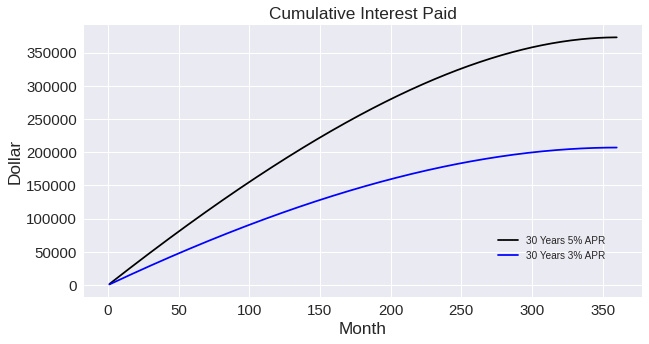

In [76]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

from matplotlib.dates import DateFormatter
from matplotlib.pyplot import figure

filename = '/content/sample_data/mortgages.csv'

df = pd.read_csv(filename)

# 1. Create a filter so the Mortgage Name is '30 Year'
year30_filter = df['Mortgage Name'] == '30 Year'
Mortage30 = df[df['Mortgage Name'] == '30 Year']

# 2. Create a filter for an interest rate of 3%
percent3_filter = df['Interest Rate'] == 0.03
percent3_filter

# 3. Define a new dataframe based on both the year and the interest filters  
a = df.loc[year30_filter & percent3_filter, :]

# 4. Create another filter where df.['Interest Rate'] == .05
percent5_filter = df['Interest Rate'] == 0.05
b = df.loc[year30_filter & percent5_filter, :]

# 5. Format the graph to recreate the look
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,5));

#axes.yaxis.set_major_locator(plt.MaxNLocator(12))
#.xaxis.set_major_locator(plt.MaxNLocator(20))

axes.locator_params(axis='y', nbins=10)
axes.title.set_text('Cumulative Interest Paid')
axes.title.set_fontsize('xx-large')
axes.xaxis.set_label_text('Month', fontsize='xx-large')
axes.yaxis.set_label_text('Dollar', fontsize='xx-large')
axes.tick_params(axis='both', labelsize=15)
axes.plot(b['Month'], b['Interest Paid'].cumsum(), label='30 Years 5% APR', c='k')
axes.plot(a['Month'], a['Interest Paid'].cumsum(), label='30 Years 3% APR', c='b')
axes.legend(loc='lower right', bbox_to_anchor=(0.45, 0.1, 0.5, 0.5))